In [3]:
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab

INFO: {'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201'}
C:\Users\abhilash\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install twitterscraper

  Stored in directory: C:\Users\abhilash\AppData\Local\pip\Cache\wheels\c2\9c\8b\7393e7bdc8abe6ce0d46c2ffae2035a1a2080a97ff0ddbdde6
Successfully built twitterscraper


In [25]:
def detector(x):
    try:
        returun(x)
    except:
        None

In [5]:
analyzer = SentimentIntensityAnalyzer()

In [17]:
begin_date= dt.date(2020,1,30)
end_date= dt.date(2020,5,30)
limit=100000
lang = 'english'

In [46]:
tweets = query_tweets('workfromhome', begindate = begin_date, enddate=end_date, limit = limit, lang = lang)

INFO: queries: ['workfromhome since:2020-01-30 until:2020-02-05', 'workfromhome since:2020-02-05 until:2020-02-11', 'workfromhome since:2020-02-11 until:2020-02-17', 'workfromhome since:2020-02-17 until:2020-02-23', 'workfromhome since:2020-02-23 until:2020-02-29', 'workfromhome since:2020-02-29 until:2020-03-06', 'workfromhome since:2020-03-06 until:2020-03-12', 'workfromhome since:2020-03-12 until:2020-03-18', 'workfromhome since:2020-03-18 until:2020-03-24', 'workfromhome since:2020-03-24 until:2020-03-30', 'workfromhome since:2020-03-30 until:2020-04-05', 'workfromhome since:2020-04-05 until:2020-04-11', 'workfromhome since:2020-04-11 until:2020-04-17', 'workfromhome since:2020-04-17 until:2020-04-23', 'workfromhome since:2020-04-23 until:2020-04-29', 'workfromhome since:2020-04-29 until:2020-05-05', 'workfromhome since:2020-05-05 until:2020-05-11', 'workfromhome since:2020-05-11 until:2020-05-17', 'workfromhome since:2020-05-17 until:2020-05-23', 'workfromhome since:2020-05-23 unt

In [47]:
tweets = pd.DataFrame(t.__dict__ for t in tweets)

In [26]:
tweets['lang'] = tweets['text'].apply(lambda x:detector(x))
tweets = tweets[tweets['lang'] == 'en']

In [50]:
tweets.to_csv('tweets12.csv')

In [51]:
covid19 = pd.read_csv('tweets12.csv') 

In [52]:
covid19.text = covid19.text.astype(str).text

AttributeError: 'Series' object has no attribute 'text'

In [53]:
sentiment= covid19['text'].apply(lambda x: analyzer.polarity_scores(x))

In [54]:
covid19 = pd.concat([covid19, sentiment.apply(pd.Series)],1)

In [55]:
covid19.drop_duplicates(subset = 'text',inplace = True)

0.0258

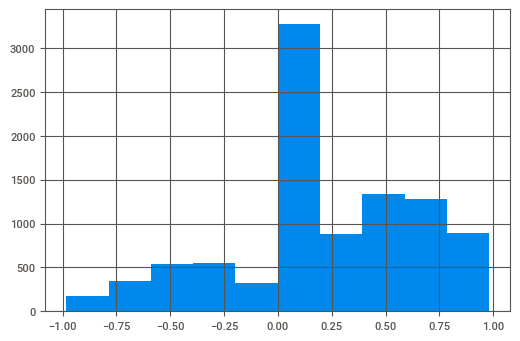

In [56]:
covid19['compound'].hist()
covid19['compound'].mean()
covid19['compound'].median()

Text(0.5, 1.0, 'work rom home')

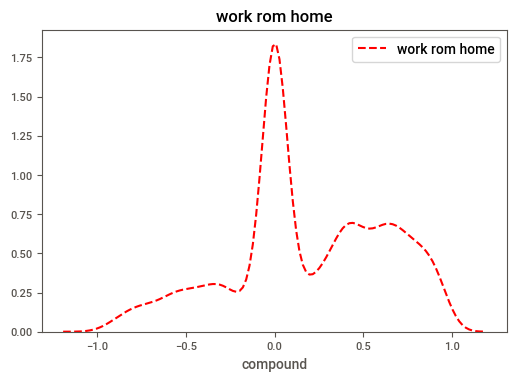

In [58]:
ax1 = sns.distplot(covid19['compound'], bins=15, hist = False, label = 'work rom home', color = 'r', kde_kws={'linestyle':'--'})

plt.legend()
plt.title('work rom home')